In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

In [2]:
sys.path.append("../scripts")

In [3]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
credit_df = pd.read_csv("../data/raw/creditcard.csv")
ip_df =pd.read_csv("../data/raw/IpAddress_to_Country.csv")

In [4]:
from proccesing import *
from eda import *
from ip_geolocation import *
from feature import *

In [5]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
fraud_df = handle_missing_values(fraud_df)

Missing values before handling:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values after handling:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


c:\Users\Kalea\Desktop\week 8 & 9\fraud-detection-adey-innovations\notebooks\../scripts\proccesing.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
c:\Users\Kalea\Desktop\week 8 & 9\fraud-detection-adey-innovations\notebooks\../scripts\proccesing.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [9]:
credit_df = handle_missing_values(credit_df)

Missing values before handling:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Missing values after handling:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
#Removes duplicates and corrects data types
fraud_df = clean_data(fraud_df)

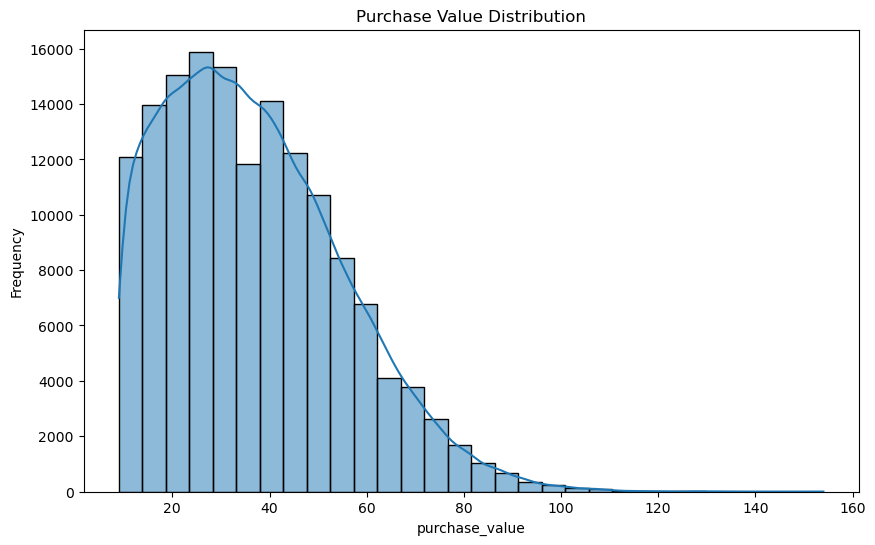

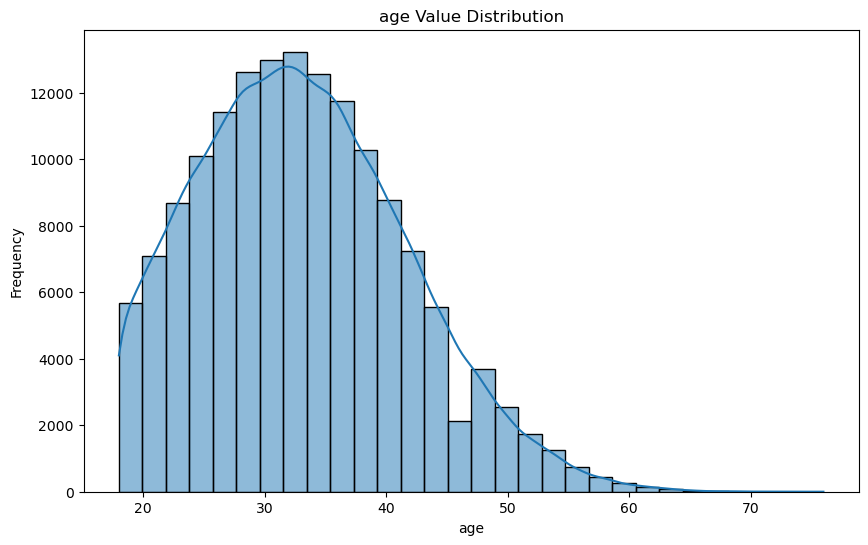

In [11]:
univariate_analysis(fraud_df, 'purchase_value', 'Purchase Value Distribution')
univariate_analysis(fraud_df, 'age', 'age Value Distribution')

C:\Users\Kalea\AppData\Local\Temp\ipykernel_8840\933173301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='class', palette=['lightblue', 'salmon'])


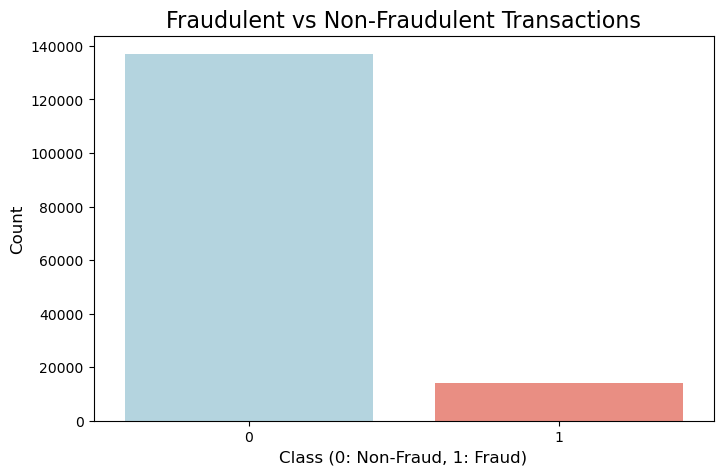

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=fraud_df, x='class', palette=['lightblue', 'salmon'])
plt.title('Fraudulent vs Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

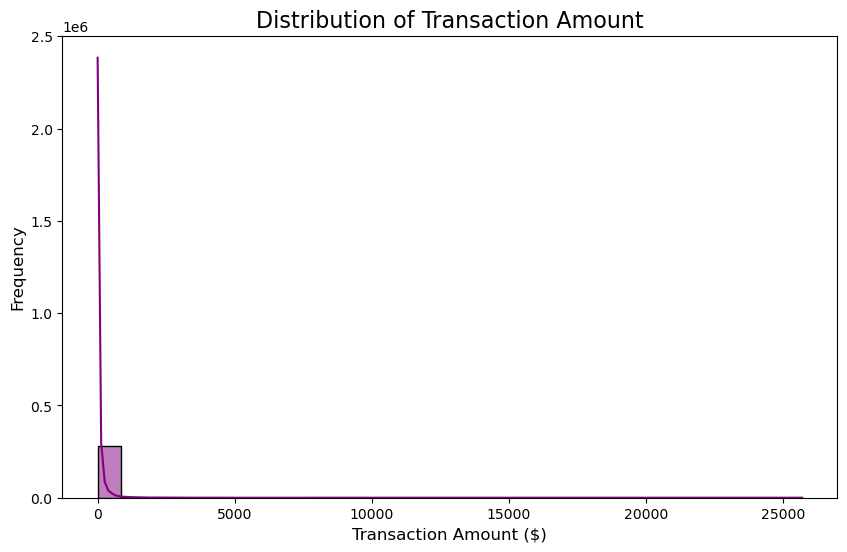

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_df['Amount'], kde=True, bins=30, color='purple')
plt.title('Distribution of Transaction Amount', fontsize=16)
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

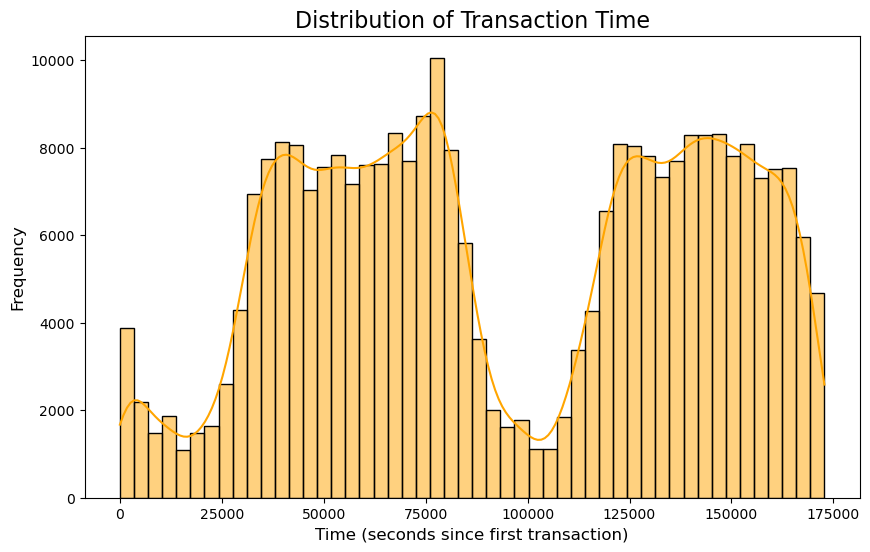

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_df['Time'], kde=True, bins=50, color='orange')
plt.title('Distribution of Transaction Time', fontsize=16)
plt.xlabel('Time (seconds since first transaction)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\Kalea\AppData\Local\Temp\ipykernel_8840\3175622293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit_df, x='Class', palette=['lightblue', 'salmon'])


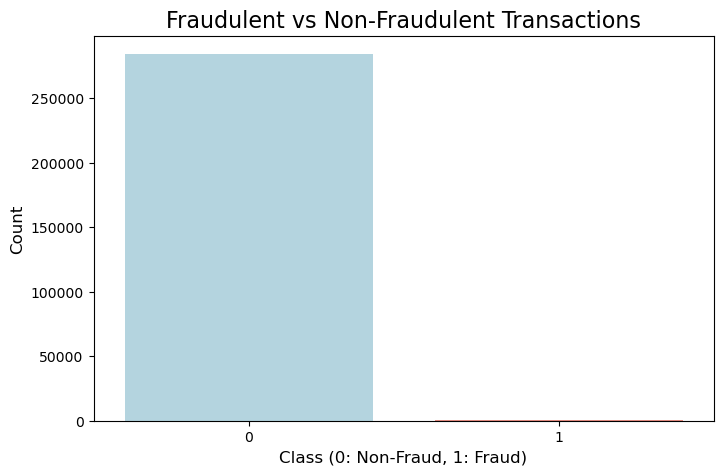

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=credit_df, x='Class', palette=['lightblue', 'salmon'])
plt.title('Fraudulent vs Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

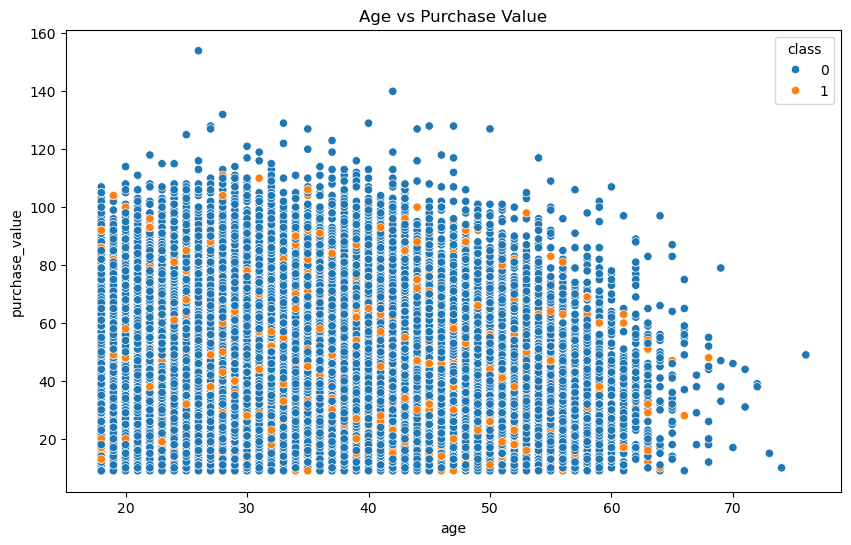

In [16]:
bivariate_analysis(fraud_df, 'age', 'purchase_value', 'Age vs Purchase Value')

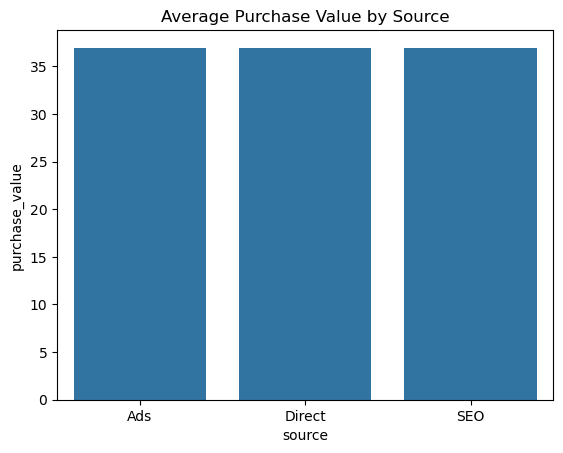

In [17]:
avg_purchase_by_source = fraud_df.groupby('source')['purchase_value'].mean().reset_index()
sns.barplot(data=avg_purchase_by_source, x='source', y='purchase_value')
plt.title('Average Purchase Value by Source')
plt.show()

C:\Users\Kalea\AppData\Local\Temp\ipykernel_8840\2349343873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_fraud, x='sex', y='class', palette=['lightblue', 'salmon'])


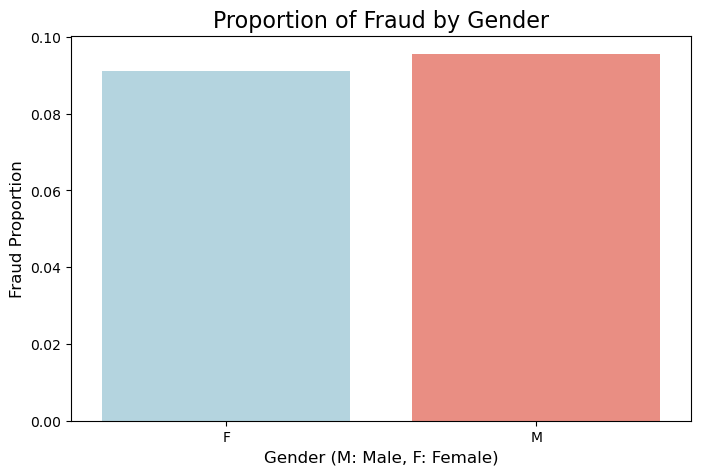

In [18]:
gender_fraud = fraud_df.groupby('sex')['class'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_fraud, x='sex', y='class', palette=['lightblue', 'salmon'])
plt.title('Proportion of Fraud by Gender', fontsize=16)
plt.xlabel('Gender (M: Male, F: Female)', fontsize=12)
plt.ylabel('Fraud Proportion', fontsize=12)
plt.show()

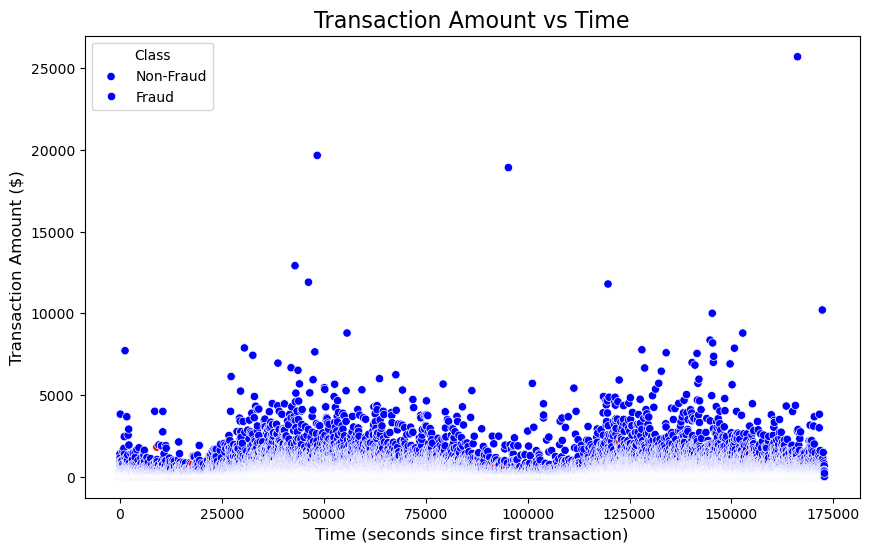

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credit_df, x='Time', y='Amount', hue='Class', palette=['blue', 'red'])
plt.title('Transaction Amount vs Time', fontsize=16)
plt.xlabel('Time (seconds since first transaction)', fontsize=12)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.show()

C:\Users\Kalea\AppData\Local\Temp\ipykernel_8840\66760615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_amount, x='Class', y='Amount', palette=['lightblue', 'salmon'])


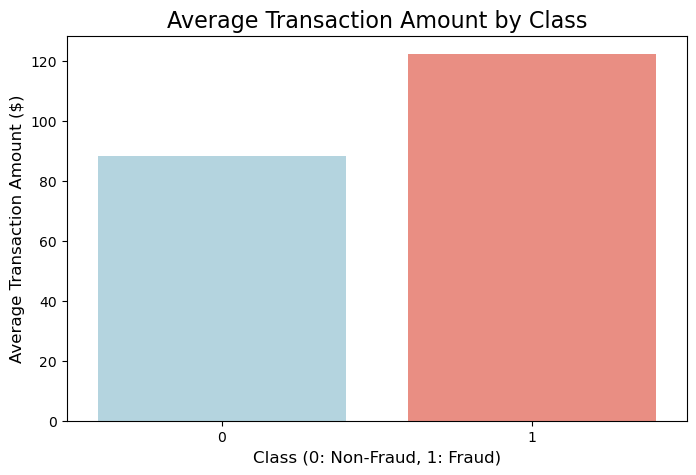

In [20]:
class_amount = credit_df.groupby('Class')['Amount'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=class_amount, x='Class', y='Amount', palette=['lightblue', 'salmon'])
plt.title('Average Transaction Amount by Class', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Average Transaction Amount ($)', fontsize=12)
plt.show()

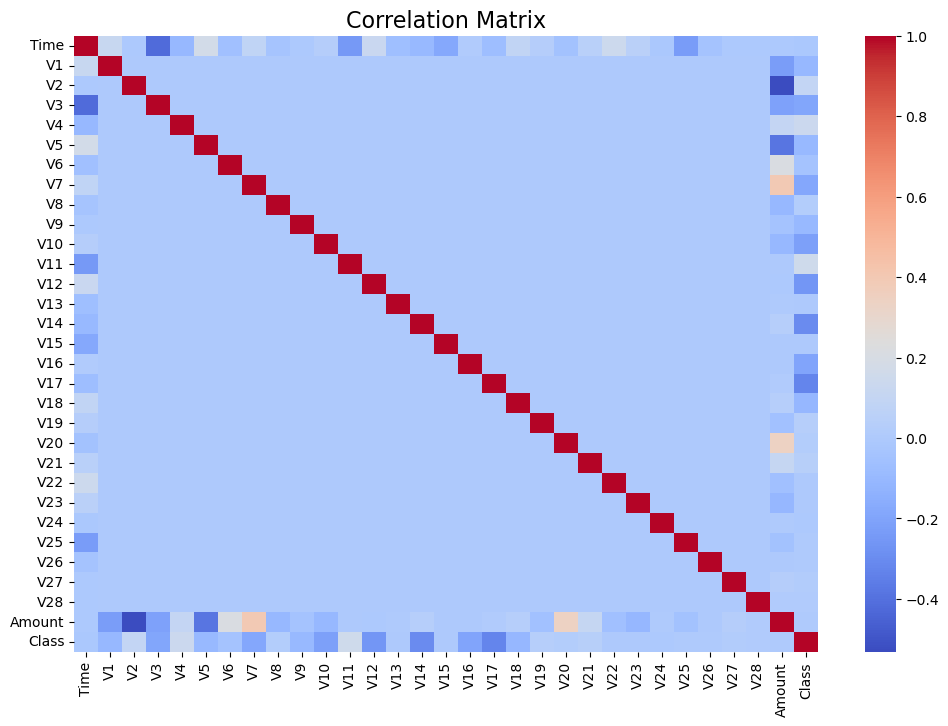

In [21]:
plt.figure(figsize=(12, 8))
correlation_matrix = credit_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### Merge Datasets for Geolocation Analysis

In [11]:
fraud_df = merge_with_geolocation(fraud_df, ip_df)

In [13]:
print(fraud_df[['user_id', 'ip_address', 'country']].head())

   user_id    ip_address     country
0    22058  7.327584e+08  Invalid IP
1   333320  3.503114e+08  Invalid IP
2     1359  2.621474e+09  Invalid IP
3   150084  3.840542e+09  Invalid IP
4   221365  4.155831e+08  Invalid IP


,lower_bound_ip_address,upper_bound_ip_address,country,lower_bound_ip_int,upper_bound_ip_int
0,16777216.0,16777471,Australia,16777216,16777471
1,16777472.0,16777727,China,16777472,16777727
2,16777728.0,16778239,China,16777728,16778239
3,16778240.0,16779263,Australia,16778240,16779263
4,16779264.0,16781311,China,16779264,16781311


     ip_address ip_int
0  7.327584e+08   None
1  3.503114e+08   None
2  2.621474e+09   None
3  3.840542e+09   None
4  4.155831e+08   None
No matching IPs found.


float64


In [ ]:
# Initialize an empty list to store matched countries
matched_countries = []

# Iterate through each row in fraud_df
for _, row in fraud_df.iterrows():
    ip_int = row['ip_int']
    
    # Find matching country for the IP range
    matching_country = ip_df[
        (ip_df['lower_bound_ip_int'] <= ip_int) & 
        (ip_df['upper_bound_ip_int'] >= ip_int)
    ]['country'].values
    
    if len(matching_country) > 0:
        matched_countries.append(matching_country[0])  # Assign the matched country
    else:
        matched_countries.append('Unknown')  # Assign 'Unknown' if no match found

# Add the matched countries as a new column in fraud_df
fraud_df['country'] = matched_countries

In [11]:
fraud_df = feature_engineering(fraud_df)

In [12]:
# Normalize and encode features
processed_data = normalize_and_encode(fraud_df)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [13]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,-0.136057,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,-1.571877,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,-1.577617,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,-1.420213,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,-0.182509,18,2
